In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [18]:
#Removing RowNumber and CustomerId column because it is irrelevant in the analysis

df = df.drop(["RowNumber", "CustomerId"], axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10001 non-null  float64
 9   IsActiveMember   10001 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 937.8+ KB


In [20]:
df.isnull().sum()

# We have very few missing data

Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
df.Surname.value_counts()

# There are too many surnames so it will not be treated as categorical data

Surname
Smith       32
Walker      29
Martin      29
Scott       29
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [22]:
df.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1010
4      990
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [23]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5085
2    4591
3     266
4      60
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

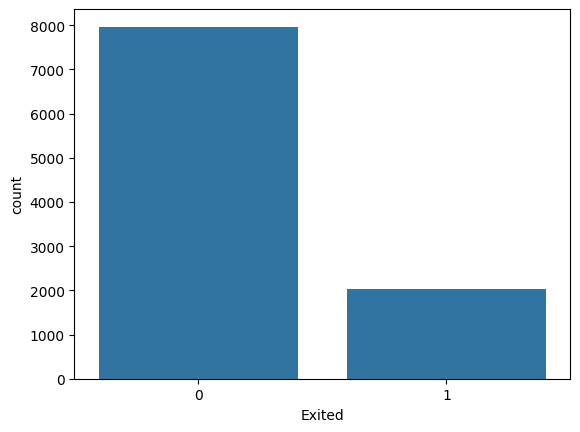

In [24]:
sns.countplot(x = "Exited", data=df)

In [25]:
df["Exited"].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

Roughly 25% of the customers have left the Bank according to the dataset.

In [26]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Tenure, NumOfProducts, HasCrCard, IsActiveMember, Geography, Gender and Exited are categorical features. And the rest are numerical features. Surname is categorical too but we will leave it out since there are too many of it.

In [27]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
categorical_data = ["Tenure", "Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]
numerical_data = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

## A quick walkthrough of the data by plotting a histogram of all numerical data to get a rough idea of the conditions of the people who exited.

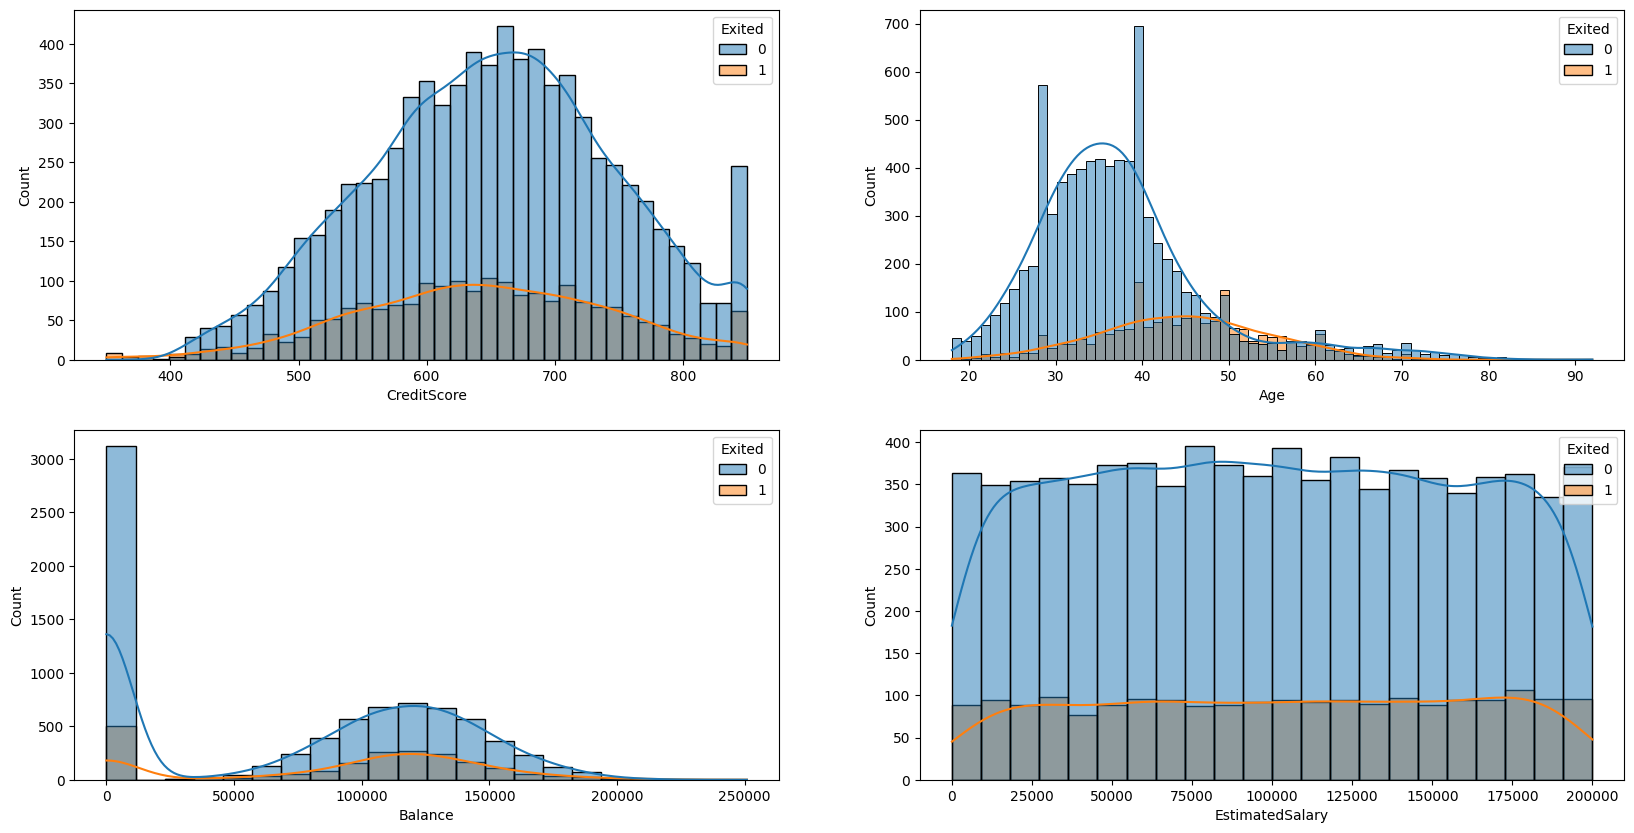

In [85]:
plt.figure(figsize=(20, 10))
for (i, j) in zip(numerical_data, range(1, len(numerical_data)+1)):
    plt.subplot(2, 2, j)
    sns.histplot(x=i, data=df, hue='Exited', kde=True)

### Observations-
### 1. Most customers of the bank belong to the age groups 28-30 and 38-40.
### 2. Almost all the customers in the age group 48-60 have exited.
### 3. The normal distribution of Credit Score is right skewed with most people having credit score between 600 and 700. There is a sharp increase in the number people having credit score 850.
### 4. Most users have Balance 0, and they also have less exiting ratio.

## Creating countplots of all the categorical data to obtain insights of the people who exited and who stayed.

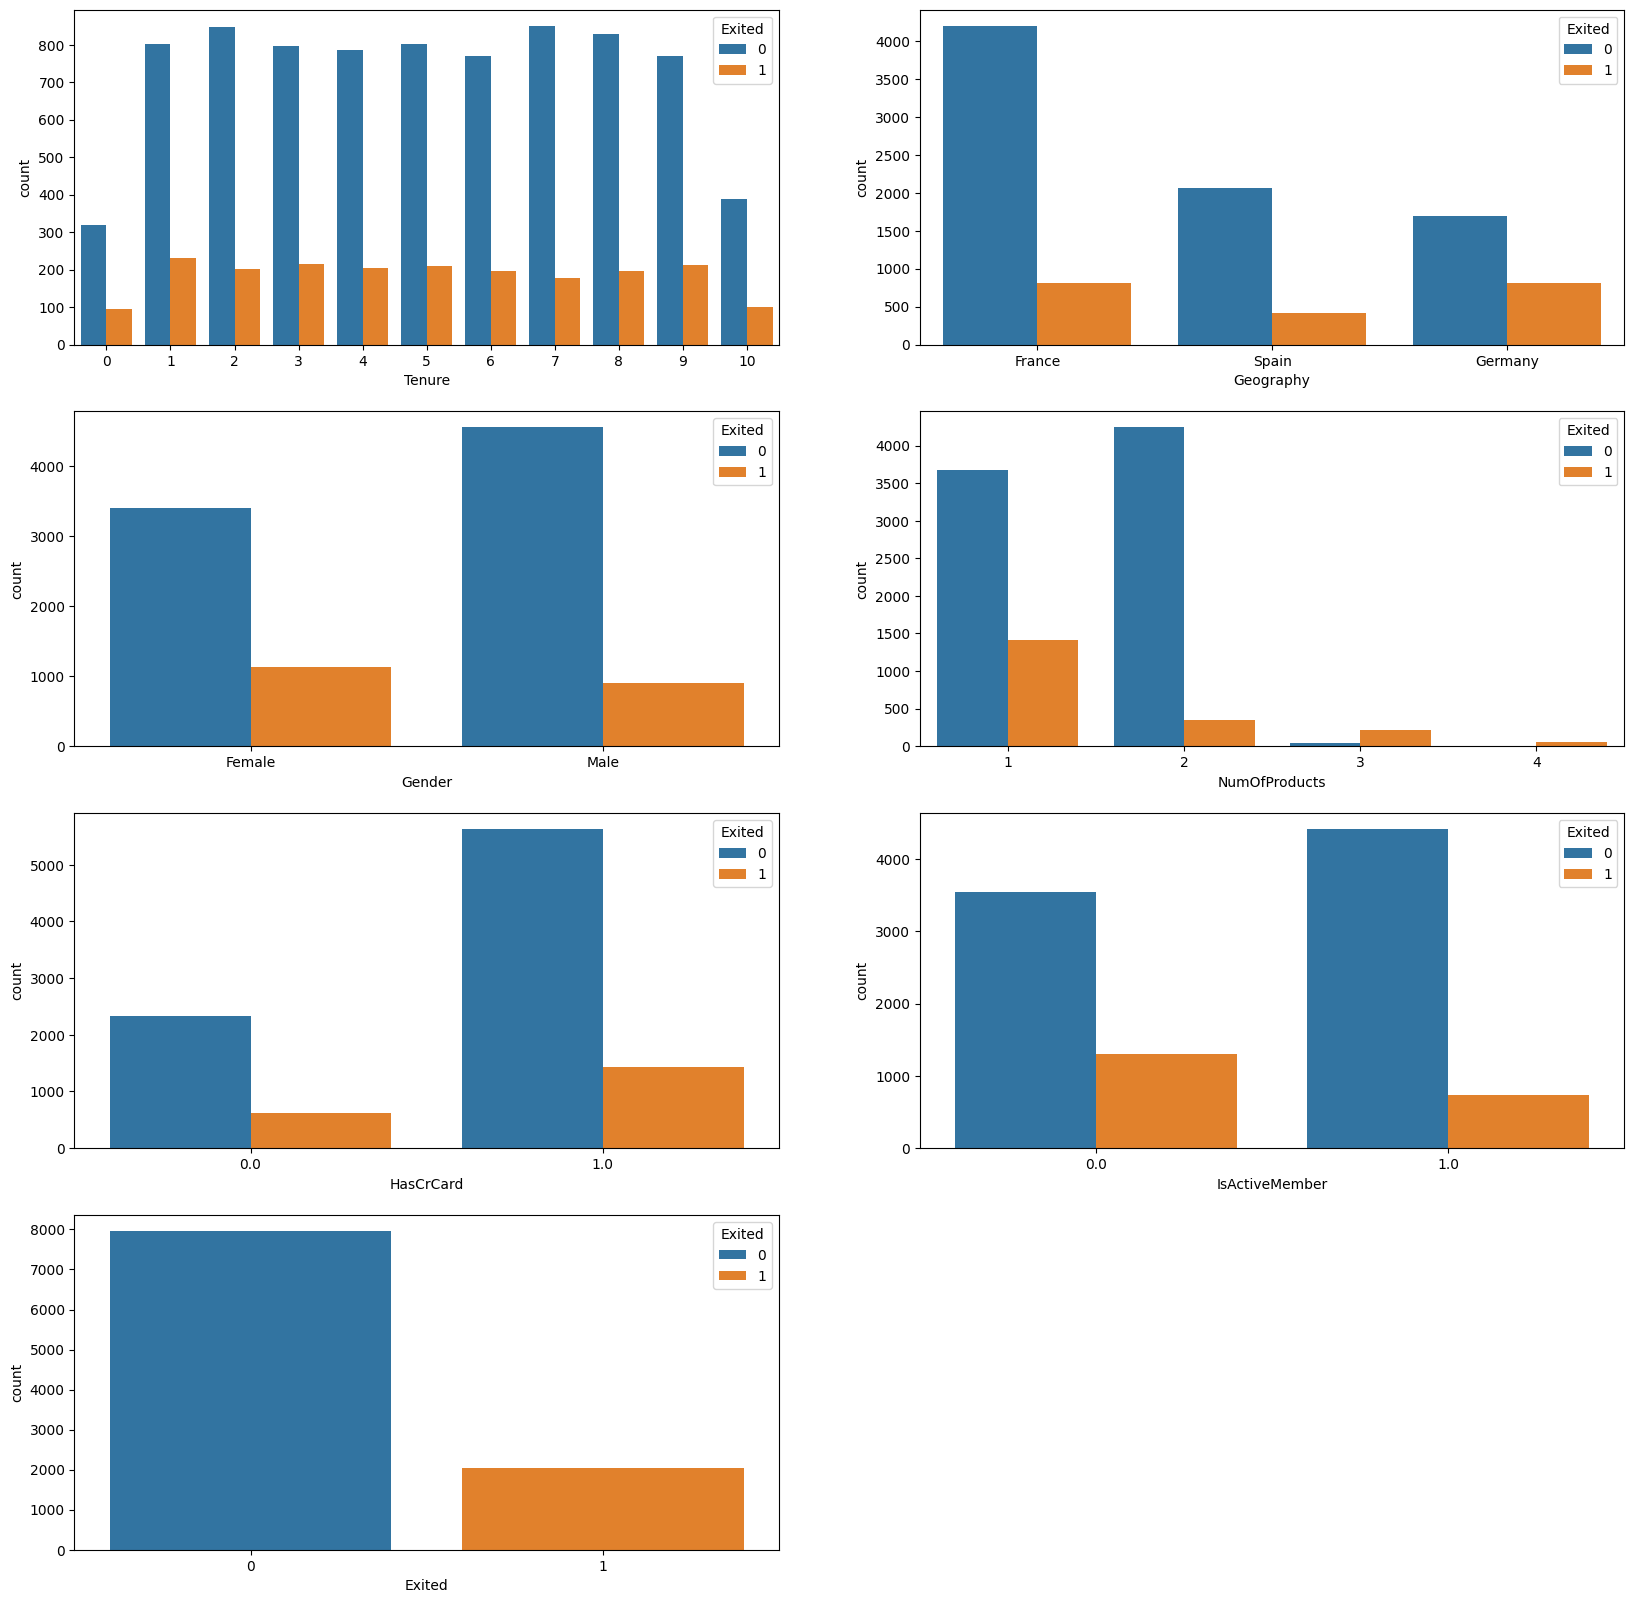

In [95]:
plt.figure(figsize=(20, 20))
for (i, j) in zip(categorical_data, range(1, len(categorical_data)+1)):
    plt.subplot(4, 2, j)
    sns.countplot(x=i, data=df, hue='Exited')

### Observations-
### 1. Half of the customer base belongs to France. The number of leaving customers in Germany is higher than France. 1/3rd of the Germans exited.
### 2. Inactive members are more likely to leave.
### 3. People with amount of products above 2 are all leaving.
### 4. The exit to statying ratio is higher in Female category.

## Plotting Exited column with hue of every other categorical column.

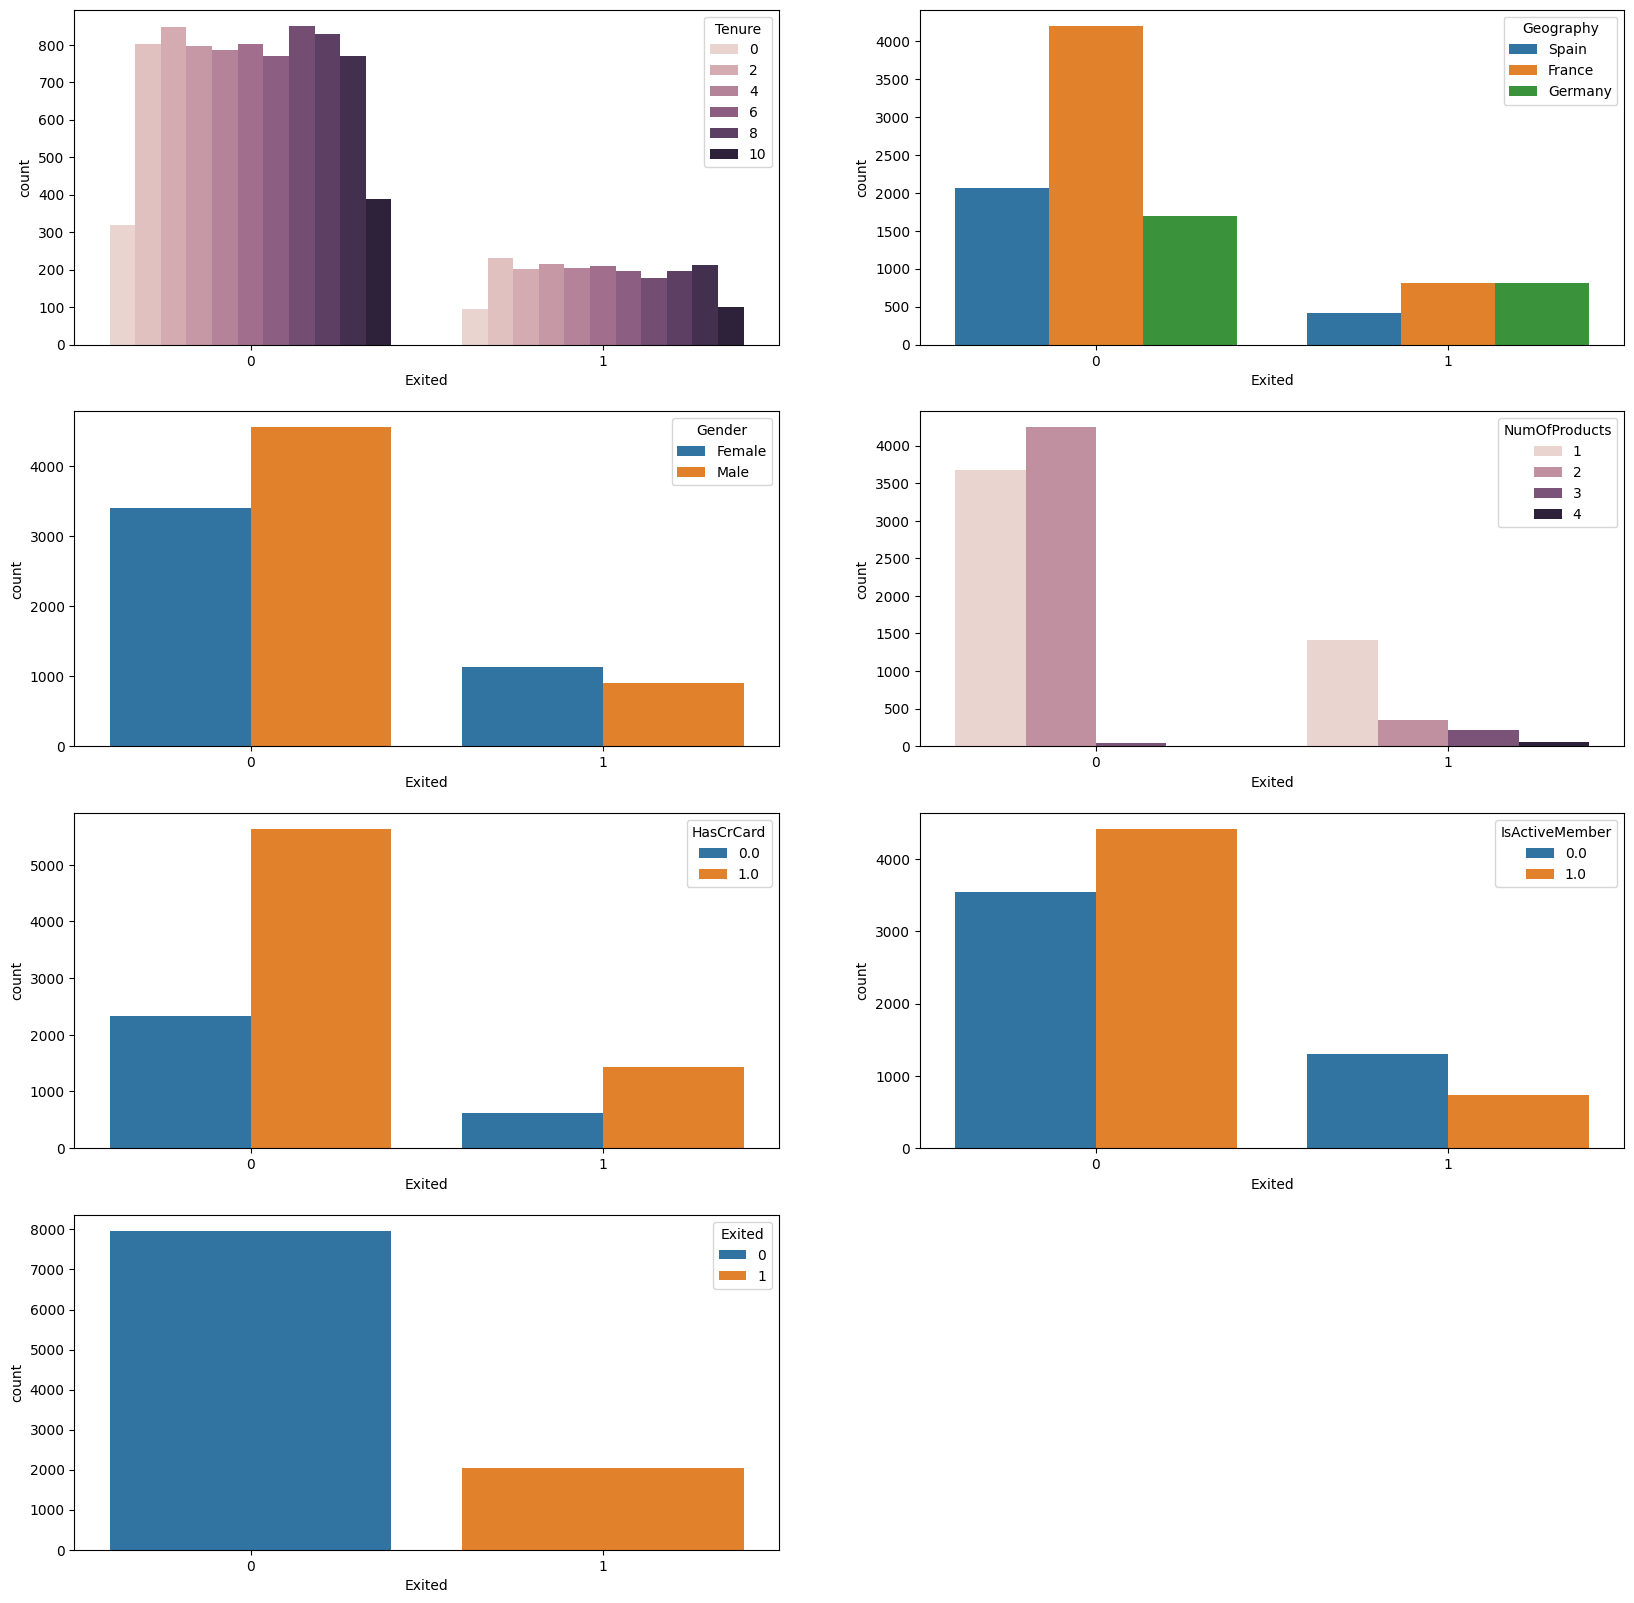

In [96]:
plt.figure(figsize=(20, 20))
for (i, j) in zip(categorical_data, range(1, len(categorical_data)+1)):
    plt.subplot(4, 2, j)
    sns.countplot(x="Exited", data=df, hue=i)

### Observations-
### 1. People from Germany leave the most.
### 2. People with 2 products leave less than people with 1 products. People with more than that all leave.
### 3. Non-Credit card holders are more likely to exit.
### 4. Inactive members leave more.

## Some additional important observations:

<Axes: xlabel='Age', ylabel='Count'>

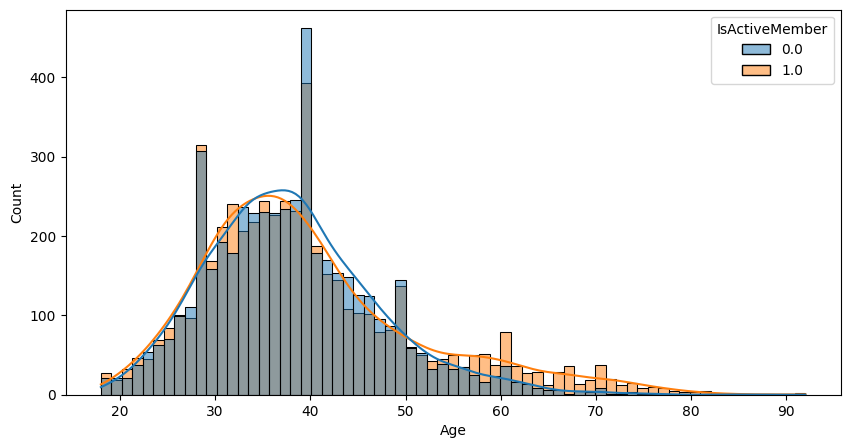

In [76]:
plt.figure(figsize=(10, 5))
sns.histplot(x="Age", data=df, hue="IsActiveMember", kde=True)

### People above the age of 50 and in their early 30s are more active.

<Axes: xlabel='Balance', ylabel='Count'>

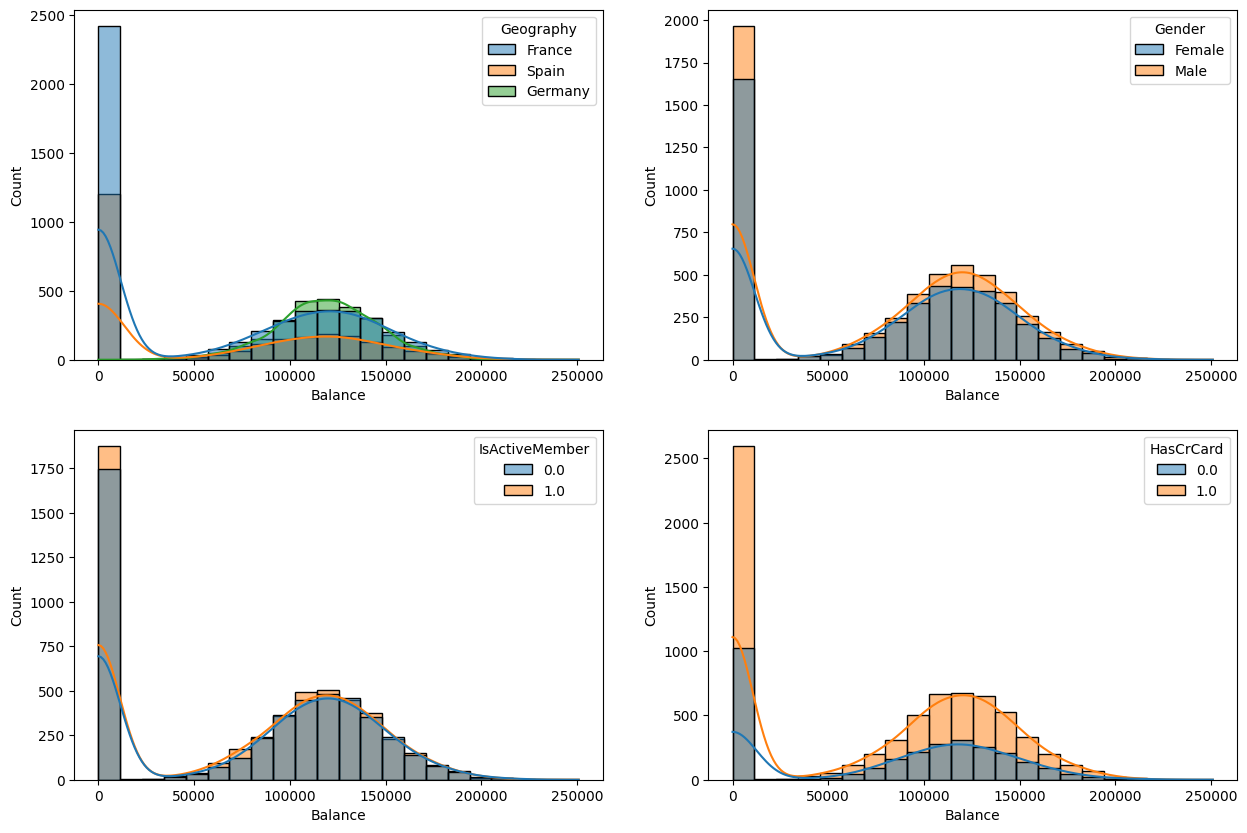

In [63]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x="Balance", data=df, hue="Geography", kde=True)

plt.subplot(2, 2, 2)
sns.histplot(x="Balance", data=df, hue="Gender", kde=True)

plt.subplot(2, 2, 3)
sns.histplot(x="Balance", data=df, hue="IsActiveMember", kde=True)

plt.subplot(2, 2, 4)
sns.histplot(x="Balance", data=df, hue="HasCrCard", kde=True)

### 1. People in Germany have more balance in their accounts than the other two countries.
### 2. Males have more bank balance than females.
### 3. Balance has almost no effect on the activeness of the customer.
### 4. People with 0 balance have more credit cards.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

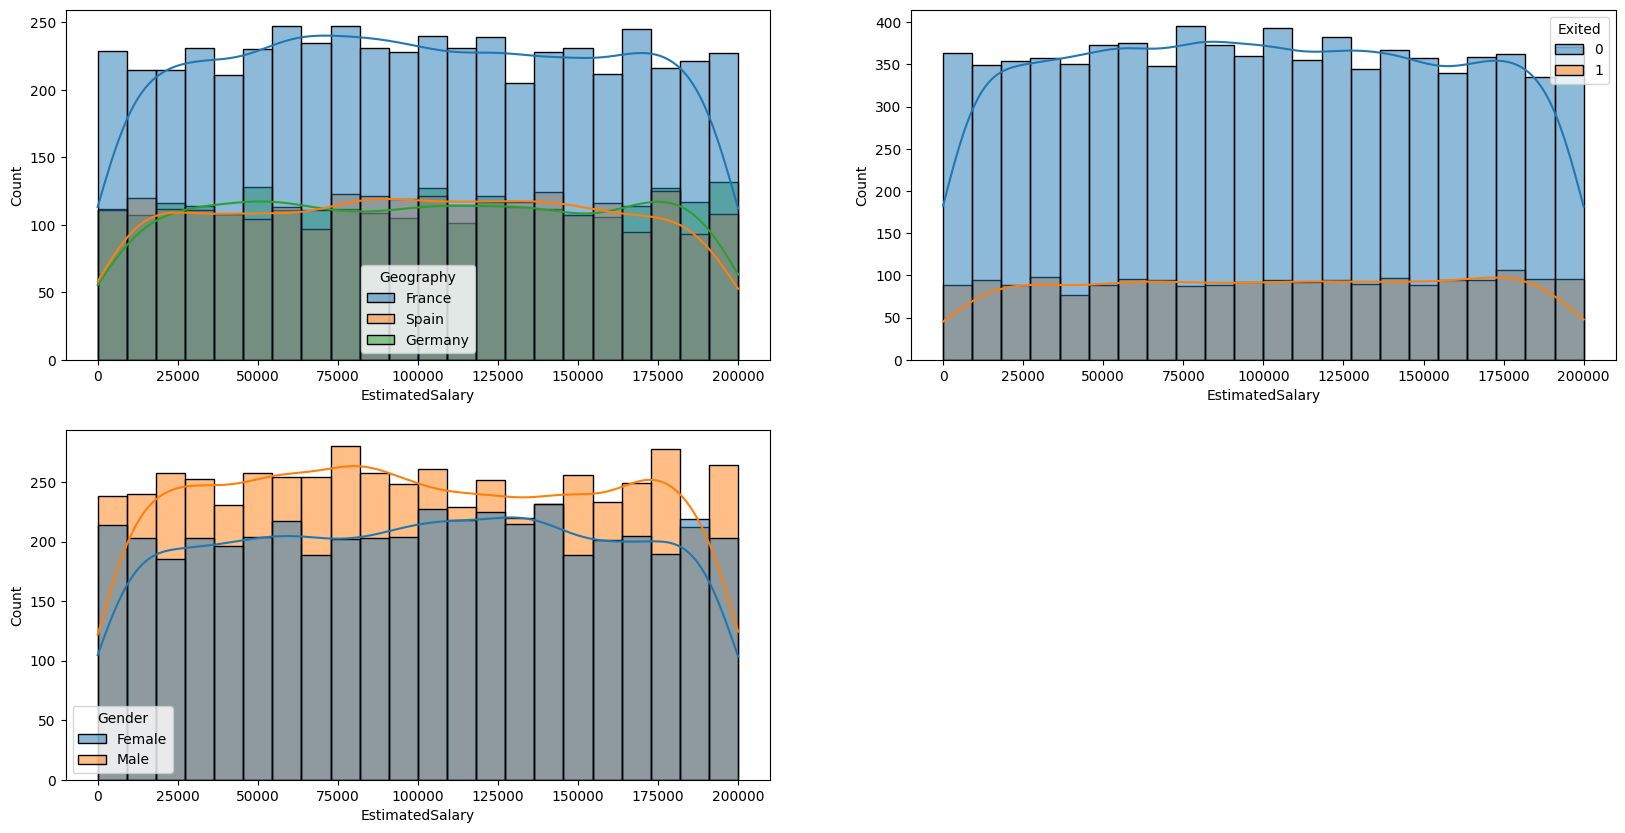

In [100]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(x="EstimatedSalary", data=df, hue="Geography", kde=True)

plt.subplot(2, 2, 2)
sns.histplot(x="EstimatedSalary", data=df, hue="Exited", kde=True)

plt.subplot(2, 2, 3)
sns.histplot(x="EstimatedSalary", data=df, hue="Gender", kde=True)

### 1. People in France have twice as much as salary as the other two countries.
### 2. Salary has almost no effect on the likelihood of exiting.
### 3. Males get more salary than females.

## No important observations were made in the CreditScore column.

# FINAL RESULTS

### 1. The Bank should focus on its Germany branches since Germans keep more bakance in their accounts, and Germans are most likely to leave which needs to be reduced.
### 2. Customers should be adviced to buy at most 2 products to prevent them from exiting. (Since having more than 2 products causes some kind of dissatisfaction)
### 3. The main focus of the bank should be the people in the age group 25-45, since they are the most active customers which are least willing to leave.
### 4. Customers should be encouranged to get credit cards.
### 5. All the above points should be emphasised more on female customers because they have more chances of leaving than male customers.